# Load the data

In [20]:
import os, shutil


def create_dir_if_not_exist(dir_path):
    if not os.path.exists(dir_path):
        os.mkdir(dir_path)

def number_of_files_in_dir(dir_path):
    return len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))])
        

# The path to the directory where the original
# dataset was uncompressed 
original_dataset_dir = 'data'
original_dataset_cats_dir = original_dataset_dir + '/cats'
original_dataset_dogs_dir = original_dataset_dir + '/dogs'

 
# The directory where we will
# store our smaller dataset
base_dir = 'processed_data'
create_dir_if_not_exist(base_dir)
 
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
create_dir_if_not_exist(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
create_dir_if_not_exist(validation_dir)
test_dir = os.path.join(base_dir, 'test')
create_dir_if_not_exist(test_dir)
 
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
create_dir_if_not_exist(train_cats_dir)
 
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
create_dir_if_not_exist(train_dogs_dir)
 
# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
create_dir_if_not_exist(validation_cats_dir)
 
# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
create_dir_if_not_exist(validation_dogs_dir)
 
# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
create_dir_if_not_exist(test_cats_dir)
 
# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
create_dir_if_not_exist(test_dogs_dir)
 
# Copy first 1000 cat images to train_cats_dir
print("-----------------------------")
print("Creating cats training dataset...")
print("")
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_cats_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    if os.path.exists(src):
        shutil.copyfile(src, dst)
 
# Copy next 500 cat images to validation_cats_dir
print("-----------------------------")
print("Creating cats validation dataset...")
print("")
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_cats_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    if os.path.exists(src):
        shutil.copyfile(src, dst)
    else:
        print("Ignoring file: " + src)
        
# Copy next 500 cat images to test_cats_dir
print("-----------------------------")
print("Creating cats test dataset...")
print("")
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_cats_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    if os.path.exists(src):
        shutil.copyfile(src, dst)
    else:
        print("Ignoring file: " + src)
        
# Copy first 1000 dog images to train_dogs_dir
print("-----------------------------")
print("Creating dogs train dataset...")
print("")
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dogs_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    if os.path.exists(src):
        shutil.copyfile(src, dst)
    else:
        print("Ignoring file: " + src)
        
# Copy next 500 dog images to validation_dogs_dir
print("-----------------------------")
print("Creating dogs validation dataset...")
print("")
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dogs_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    if os.path.exists(src):
        shutil.copyfile(src, dst)
    else:
        print("Ignoring file: " + src)
    
# Copy next 500 dog images to test_dogs_dir
print("-----------------------------")
print("Creating dogs test dataset...")
print("")
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dogs_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    if os.path.exists(src):
        shutil.copyfile(src, dst)
    else:
        print("Ignoring file: " + src)
        
print("Done")
print("Result:")
print("Training dataset: cats - %d, dogs - %d" % (number_of_files_in_dir(train_cats_dir), number_of_files_in_dir(train_dogs_dir)))
print("Test dataset: cats - %d, dogs - %d" % (number_of_files_in_dir(test_cats_dir), number_of_files_in_dir(test_dogs_dir)))
print("Validation dataset: cats - %d, dogs - %d" % (number_of_files_in_dir(validation_cats_dir),number_of_files_in_dir(validation_dogs_dir)))

-----------------------------
Creating cats training dataset...

-----------------------------
Creating cats validation dataset...

-----------------------------
Creating cats test dataset...

-----------------------------
Creating dogs train dataset...

-----------------------------
Creating dogs validation dataset...

-----------------------------
Creating dogs test dataset...

Done
Result:
Training dataset: cats - 1000, dogs - 1000
Test dataset: cats - 500, dogs - 500
Validation dataset: cats - 500, dogs - 500


# Create a network

In [45]:
from keras import models
from keras import layers
from keras import optimizers
  
network = models.Sequential()
network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Flatten())
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

print(network.summary())

network.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 15, 15, 128)     

# Data preprocessing

In [46]:
from keras.preprocessing.image import ImageDataGenerator
 
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Fit the model

In [47]:
history = network.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

network.save('cats_and_dogs_small_1.h5')


Epoch 1/30
100/100 [==============================] - 34s 337ms/step - loss: 0.6882 - accuracy: 0.5370 - val_loss: 0.6841 - val_accuracy: 0.5830
Epoch 2/30
100/100 [==============================] - 35s 349ms/step - loss: 0.6467 - accuracy: 0.6210 - val_loss: 0.6568 - val_accuracy: 0.5730
Epoch 3/30
100/100 [==============================] - 36s 355ms/step - loss: 0.5905 - accuracy: 0.6770 - val_loss: 0.6182 - val_accuracy: 0.6740
Epoch 4/30
100/100 [==============================] - 35s 352ms/step - loss: 0.5636 - accuracy: 0.7010 - val_loss: 0.6566 - val_accuracy: 0.6730
Epoch 5/30
100/100 [==============================] - 35s 347ms/step - loss: 0.5380 - accuracy: 0.7265 - val_loss: 0.6950 - val_accuracy: 0.6670
Epoch 6/30
100/100 [==============================] - 35s 349ms/step - loss: 0.5105 - accuracy: 0.7485 - val_loss: 0.6155 - val_accuracy: 0.6850
Epoch 7/30
100/100 [==============================] - 36s 359ms/step - loss: 0.4848 - accuracy: 0.7635 - val_loss: 0.5064 - val_a

# Outcome analisys

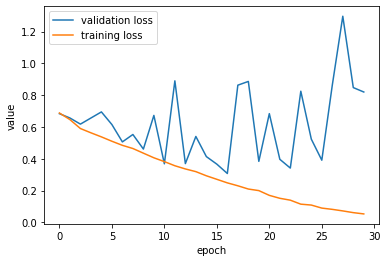

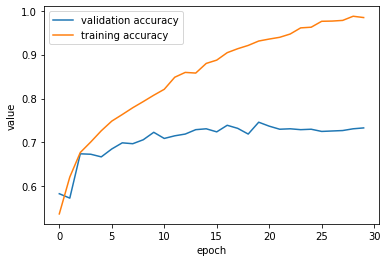

In [49]:
%matplotlib inline 
from matplotlib import pyplot as plt

history_dict = history.history
metrics = history_dict.keys()

validation_loss = history_dict['val_loss']
training_loss = history_dict['loss']

plt.plot(range(len(validation_loss)), validation_loss, label='validation loss')
plt.plot(range(len(training_loss)), training_loss, label='training loss')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

validation_acc = history_dict['val_accuracy']
training_acc = history_dict['accuracy']
plt.plot(range(len(validation_acc)), validation_acc, label='validation accuracy')
plt.plot(range(len(training_acc)), training_acc, label='training accuracy')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

# Data augmentation

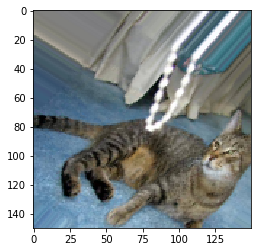

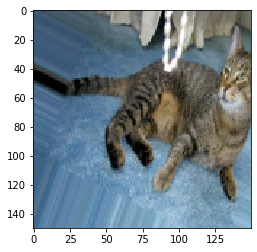

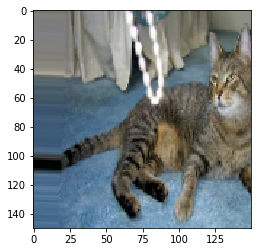

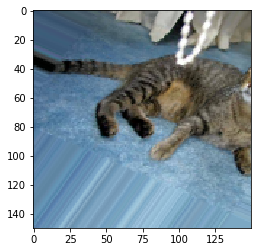

In [50]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# This is module with image preprocessing utilities
from keras.preprocessing import image
 
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
 
# We pick one image to "augment"
img_path = fnames[3]
 
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
 
# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
 
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
 
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
 
plt.show()

# Train new network

In [52]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
 
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

network = models.Sequential()
network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Flatten())
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(1, activation='sigmoid'))

print(network.summary())

network.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history = network.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

network.save('cats_and_dogs_small_1_augmented.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 17, 17, 128)       0         
___________________________________

# Plot new results 

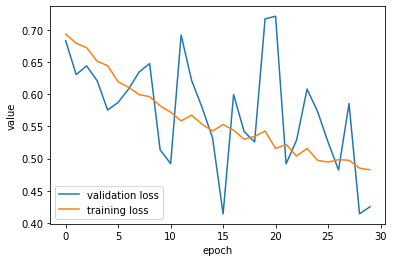

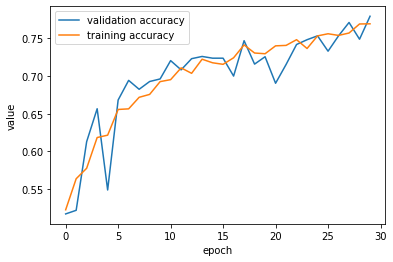

In [53]:
%matplotlib inline 
from matplotlib import pyplot as plt

history_dict = history.history
metrics = history_dict.keys()

validation_loss = history_dict['val_loss']
training_loss = history_dict['loss']

plt.plot(range(len(validation_loss)), validation_loss, label='validation loss')
plt.plot(range(len(training_loss)), training_loss, label='training loss')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

validation_acc = history_dict['val_accuracy']
training_acc = history_dict['accuracy']
plt.plot(range(len(validation_acc)), validation_acc, label='validation accuracy')
plt.plot(range(len(training_acc)), training_acc, label='training accuracy')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()